In [2]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [3]:
pwd

'/Users/dylanteasdale/Desktop/datascience/module01/project01/movie-analysis-project'

In [4]:
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [5]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
from glob import glob

In [7]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [151]:
type(csv_files)
d = {}

In [9]:
for file in csv_files:
    d[file] = pd.read_csv(file)

In [10]:
d.keys()

dict_keys(['./zippedData/imdb.title.crew.csv.gz', './zippedData/tmdb.movies.csv.gz', './zippedData/imdb.title.akas.csv.gz', './zippedData/imdb.title.ratings.csv.gz', './zippedData/imdb.name.basics.csv.gz', './zippedData/imdb.title.basics.csv.gz', './zippedData/tn.movie_budgets.csv.gz', './zippedData/bom.movie_gross.csv.gz', './zippedData/imdb.title.principals.csv.gz'])

In [11]:
d['./zippedData/imdb.title.crew.csv.gz'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [12]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [13]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

In [14]:
csv_files_dict['imdb_title_crew_gz'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB


In [15]:
for key in csv_files_dict:
     print(key, csv_files_dict[key].info())


<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB
imdb_title_crew_gz None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
tmdb_movies_gz None
<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
ordering             331703 non-null int64
title       

Since we will be working with Pandas we need to organize our DFs. Let's start by renaming all of them and adding them to a new dictionary. By creating a new dictionary of DFs, we can manipulate the data without messing up the originals in csv_files_dict.



In [16]:
df_repository = {} #by creating a dictionary, we can manipulate the data without messing up the originals in csv_files_dict
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames    
    exec('df_'+ filename_cleaned + """ = csv_files_dict['""" + filename_cleaned + """']""") #executing code using strings
    exec("""df_repository[""" + """'""" + filename_cleaned + """']""" + """= df_""" + filename_cleaned )


As seen below, the dataframes contain duplicates, which should be removed

In [17]:
for db in df_repository.keys():
    print(db, 'contains ', df_repository[db].duplicated().sum(), ' duplicates')

imdb_title_crew_gz contains  22915  duplicates
tmdb_movies_gz contains  1020  duplicates
imdb_title_akas_gz contains  2220  duplicates
imdb_title_ratings_gz contains  45074  duplicates
imdb_name_basics_gz contains  239  duplicates
imdb_title_basics_gz contains  122  duplicates
tn_movie_budgets_gz contains  0  duplicates
bom_movie_gross_gz contains  11  duplicates
imdb_title_principals_gz contains  114187  duplicates


In [18]:
def clean_duplicates(dataframe): #returns a dataframe without duplicates
    cleaned_filter = dataframe.duplicated()
    index_to_drop = dataframe.loc[cleaned_filter].index
    return dataframe.drop(index=index_to_drop)

In [19]:
for db in df_repository.keys(): #loop to parse dataframes through the clean_duplicates() function we wrote above
    df_repository[db] = clean_duplicates(df_repository[db])

In [20]:
for db in df_repository.keys():
    print(db, 'contains ', df_repository[db].duplicated().sum(), ' duplicates') #checking if it worked

imdb_title_crew_gz contains  0  duplicates
tmdb_movies_gz contains  0  duplicates
imdb_title_akas_gz contains  0  duplicates
imdb_title_ratings_gz contains  0  duplicates
imdb_name_basics_gz contains  0  duplicates
imdb_title_basics_gz contains  0  duplicates
tn_movie_budgets_gz contains  0  duplicates
bom_movie_gross_gz contains  0  duplicates
imdb_title_principals_gz contains  0  duplicates


Elimination of NaN values

In [21]:
def NaN_to_zero(DataFrame, DataSeries, change_into=0):
    filt = DataSeries.isna()
    DataFrame.loc[filt] = change_into
    return DataFrame

In [22]:
#testing the NaN_to_zero function 
df_bom_movie_gross_gz.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [23]:
NaN_to_zero(df_bom_movie_gross_gz, df_bom_movie_gross_gz.foreign_gross).isna().sum()

studio             4
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [24]:
def string_to_float(string):
    if string == None:
        new_string = 0
    else:
        if (type(string) != int) and (type(string) != float):
            new_string = string.replace('$', '')
            new_string = new_string.replace(',', '')

        else:
            new_string = string
    return float(new_string)


def series_string_to_float(dataseries):
    new_dataseries = dataseries.apply(string_to_float)
    return new_dataseries

In [25]:
type(df_bom_movie_gross_gz.foreign_gross[0]) #the data here is stored as strings instead of numerical values


str

In [26]:
new_series = series_string_to_float(df_bom_movie_gross_gz.foreign_gross)
type(new_series[0]) #checking if it works

numpy.float64

After cleaning data, we can start creating new features

In [27]:
df_bom_movie_gross_gz.foreign_gross = series_string_to_float(df_bom_movie_gross_gz.foreign_gross)

In [28]:
df_bom_movie_gross_gz['total_gross'] = df_bom_movie_gross_gz['foreign_gross'].add(df_bom_movie_gross_gz['domestic_gross'], fill_value=0.0)
df_bom_movie_gross_gz.head()

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08



In order to simplify the manipulation of data, the column names of each df could be standardized ('title' vs 'movie title' vs 'original title', etc)

Question 1: How does Genre affect box office profits?

Let's start by working out what data we will uise for profits

We can compare the two datasets of columns of 'worldwide_gross' & 'total_gross' which we created earlier

In [29]:
tn_movies = list(df_tn_movie_budgets_gz.movie.unique())
#I reset the index because it was the movie title
bom_movies = list(df_bom_movie_gross_gz.reset_index().title.unique())   

In [30]:
len(set(tn_movies + bom_movies))

7846

In [31]:
df_tn_movie_budgets_gz.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [32]:
#change this into a for loop

In [33]:
df_tn_movie_budgets_gz.domestic_gross = series_string_to_float(df_tn_movie_budgets_gz.domestic_gross)

In [34]:
df_tn_movie_budgets_gz.worldwide_gross = series_string_to_float(df_tn_movie_budgets_gz.worldwide_gross)

In [35]:
df_tn_movie_budgets_gz.production_budget = series_string_to_float(df_tn_movie_budgets_gz.production_budget)

In [36]:
df_tn_movie_budgets_gz.sort_values(by=['domestic_gross'], ascending=False).head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09
34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09
27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09


In [37]:
df_bom_movie_gross_gz.sort_values(by=['domestic_gross'], ascending=False).head(10)

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,9.367011e+08
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08
Jurassic World,Uni.,652300000.0,1019.4,2015,6.523010e+08
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09


To simplify things we have decided to stick with using one dataset tn_movie_budgets due to it being a larger dataset

In [38]:
df_tn_movie_budgets_gz['total_profit'] = df_tn_movie_budgets_gz['worldwide_gross'].subtract(df_tn_movie_budgets_gz['production_budget'], fill_value=0.0)
df_tn_movie_budgets_gz.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [39]:
df_tn_movie_budgets_gz['profit_margin'] = df_tn_movie_budgets_gz['total_profit'].div(df_tn_movie_budgets_gz['worldwide_gross'], fill_value=0.0)
df_tn_movie_budgets_gz.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,0.759251


In [40]:
#We now have a total profit & profit margin columns included

Elimination of NaN values for tn_movie_budgets

In [41]:
#testing for NaN values
df_tn_movie_budgets_gz.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
total_profit         0
profit_margin        0
dtype: int64

In [42]:
#testing for common strange values 

In [43]:
items_counts = df_tn_movie_budgets_gz['worldwide_gross'].value_counts(normalize = True)
print(items_counts)

0.0            0.063473
8000000.0      0.001557
7000000.0      0.001038
2000000.0      0.001038
9000000.0      0.000692
                 ...   
18524496.0     0.000173
85632458.0     0.000173
527079962.0    0.000173
261443242.0    0.000173
124827316.0    0.000173
Name: worldwide_gross, Length: 5356, dtype: float64


Now that we know our profit dataframe has clean data, we can start working on genre

Now lets explore which genre dataset fits best before cleaning the data set...

In [44]:
df_tmdb_movies_gz.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [45]:
df_tmdb_movies_gz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.3+ MB


Genres are not in readable format in this dataset

In [46]:
df_imdb_title_basics_gz.head(10)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"


In [47]:
df_imdb_title_basics_gz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 11.7+ MB


In [48]:
#Explortation into the genre values

In [49]:
df_imdb_title_basics_gz['genres'].isna().sum()

5408

In [50]:
#Remove all rows with NaN values in genres

In [51]:
df_imdb_title_basics_gz = df_imdb_title_basics_gz[df_imdb_title_basics_gz['genres'].notna()]

In [52]:
df_imdb_title_basics_gz['genres'].isna().sum()

0

In [53]:
df_imdb_title_basics_gz.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [54]:
#using merge and using a left join. As col names are different, using left_on and right_on options

movie_details_df = pd.merge(df_tn_movie_budgets_gz, df_imdb_title_basics_gz, left_on=  ['movie'],
                   right_on= ['primary_title'], 
                   how = 'left')

In [55]:
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,0.759251,NaN,NaN,NaN,NaN,NaN


In [56]:
movie_details_df.shape

(7162, 12)

In [57]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7162 entries, 0 to 7161
Data columns (total 12 columns):
release_date         7162 non-null object
movie                7162 non-null object
production_budget    7162 non-null float64
domestic_gross       7162 non-null float64
worldwide_gross      7162 non-null float64
total_profit         7162 non-null float64
profit_margin        7162 non-null float64
primary_title        3743 non-null object
original_title       3743 non-null object
start_year           3743 non-null float64
runtime_minutes      3309 non-null float64
genres               3743 non-null object
dtypes: float64(7), object(5)
memory usage: 727.4+ KB


In [58]:
#removing Nan values from genres column
movie_details_df = movie_details_df[movie_details_df['genres'].notna()]

In [59]:
movie_details_df.shape

(3743, 12)

In [60]:
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.853525,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"


In [61]:
#genre is a list of upto 3 genres, splitting it to get the individual genres

movie_details_df['genres'] = movie_details_df['genres'].apply(lambda x: x.split(",") if x else x)
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,Avatar,Abatâ,2011.0,93.0,[Horror]
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,Dark Phoenix,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.853525,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"


In [62]:
#Writing code to select first genre value in each row

In [63]:
single_genres = pd.DataFrame(movie_details_df['genres'].values.tolist()).iloc[:, [0]]


In [64]:
movie_details_df['genres'] = single_genres 

In [65]:
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Action
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,Dark Phoenix,Dark Phoenix,2019.0,113.0,Action
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,Action
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.853525,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,Action


In [66]:
movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 7160
Data columns (total 12 columns):
release_date         3743 non-null object
movie                3743 non-null object
production_budget    3743 non-null float64
domestic_gross       3743 non-null float64
worldwide_gross      3743 non-null float64
total_profit         3743 non-null float64
profit_margin        3743 non-null float64
primary_title        3743 non-null object
original_title       3743 non-null object
start_year           3743 non-null float64
runtime_minutes      3309 non-null float64
genres               1940 non-null object
dtypes: float64(7), object(5)
memory usage: 380.1+ KB


In [67]:
genre_movie_details_df = (movie_details_df.drop(columns=['release_date', 'primary_title', 'original_title', 'runtime_minutes']))

In [68]:
genre_movie_details_df.head(10)

,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year,genres
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,2011.0,Horror
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,2011.0,Action
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,2019.0,Action
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,2015.0,Action
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.853525,2018.0,Action
8,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,0.542645,2017.0,Action
9,Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08,0.658944,2015.0,Action
10,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,8.094391e+08,0.746413,2012.0,Action
11,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,1.181513e+08,0.300524,2018.0,Adventure
12,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,-1.499788e+07,-0.057684,2013.0,Action


In [69]:
group_genre_df = genre_movie_details_df.groupby('genres').mean()

In [70]:
group_genre_df.head()

,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year
genres,,,,,,
Action,9.215035e+07,1.013036e+08,2.697877e+08,1.776374e+08,-inf,2014.291667
Adventure,9.480458e+07,1.350061e+08,3.405871e+08,2.457826e+08,0.158245,2014.473282
Animation,7.335294e+07,6.696269e+07,1.638124e+08,9.045948e+07,0.264964,2014.411765
Biography,4.796903e+07,5.087872e+07,1.114275e+08,6.345843e+07,-inf,2014.097345
Comedy,4.131801e+07,5.374505e+07,1.150324e+08,7.371442e+07,-inf,2014.308475


In [75]:
n_genres_df = group_genre_df.sort_values(by='total_profit', ascending=False)
n_genres_df.head()

,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year
genres,,,,,,
Adventure,9.480458e+07,1.350061e+08,3.405871e+08,2.457826e+08,0.158245,2014.473282
Musical,6.300000e+07,9.948188e+07,2.542372e+08,1.912372e+08,0.580795,2013.333333
Family,7.029167e+07,1.000226e+08,2.581017e+08,1.878101e+08,-0.058865,2014.166667
Action,9.215035e+07,1.013036e+08,2.697877e+08,1.776374e+08,-inf,2014.291667
Sci-Fi,4.944286e+07,9.570740e+07,2.153017e+08,1.658588e+08,-6.093551,2014.785714


In [76]:
genres_top10_df = n_genres_df[:10]

In [77]:
genres_top10_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Adventure to Documentary
Data columns (total 6 columns):
production_budget    10 non-null float64
domestic_gross       10 non-null float64
worldwide_gross      10 non-null float64
total_profit         10 non-null float64
profit_margin        10 non-null float64
start_year           10 non-null float64
dtypes: float64(6)
memory usage: 560.0+ bytes


In [94]:
genres_top10_df.head()

,,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin
start_year,genres,,,,,
2010.666667,War,5.600000e+07,8.216505e+07,2.051130e+08,149113035,0.610834
2013.333333,Musical,6.300000e+07,9.948188e+07,2.542372e+08,191237183,0.580795
2014.166667,Family,7.029167e+07,1.000226e+08,2.581017e+08,187810081,-0.058865
2014.291667,Action,9.215035e+07,1.013036e+08,2.697877e+08,177637366,-inf
2014.308458,Documentary,4.639701e+07,5.723734e+07,1.263882e+08,79991225,-inf


In [83]:
genres_top10_df.reset_index(inplace=True)

In [84]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 12.5

[Text(0, 0.5, 'Avg. Profit (100M)'), Text(0.5, 0, 'Genres')]

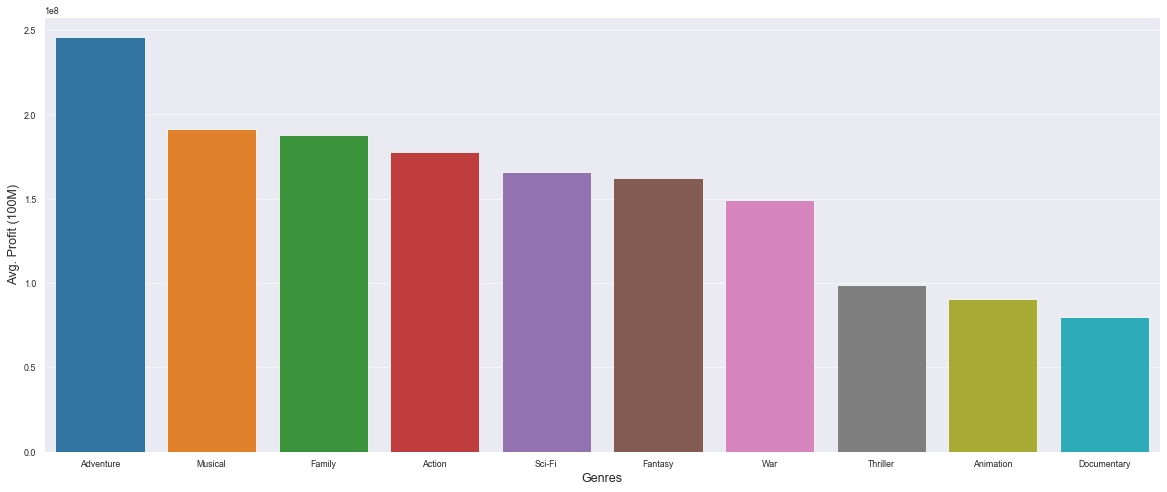

In [85]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x='genres', y='total_profit', data=genres_top10_df);
ax.set(xlabel="Genres", ylabel = "Avg. Profit (100M)")
                


In [108]:
genre_movie_details_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year,genres
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,2011.0,Horror
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,2011.0,Action
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,2019.0,Action
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,2015.0,Action
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.853525,2018.0,Action


In [109]:
n_genres_df = genre_movie_details_df.groupby(['start_year', 'genres']).sum()
n_genres_df.head()

production_budget  domestic_gross  worldwide_gross  \
start_year genres                                                          
2010.0     Action          3.470700e+09    3.671293e+09     9.590798e+09   
           Adventure       1.197000e+09    1.516761e+09     3.946603e+09   
           Animation       2.150000e+08    2.826224e+08     6.122855e+08   
           Biography       9.080000e+08    9.012509e+08     2.075421e+09   
           Comedy          1.225000e+09    1.356928e+09     2.733486e+09   

                      total_profit  profit_margin  
start_year genres                                  
2010.0     Action     6.120098e+09    -170.857338  
           Adventure  2.749603e+09       5.290412  
           Animation  3.972855e+08       1.814915  
           Biography  1.167421e+09      -4.906329  
           Comedy     1.508486e+09    -114.632919

In [110]:
df = n_genres_df.reset_index()

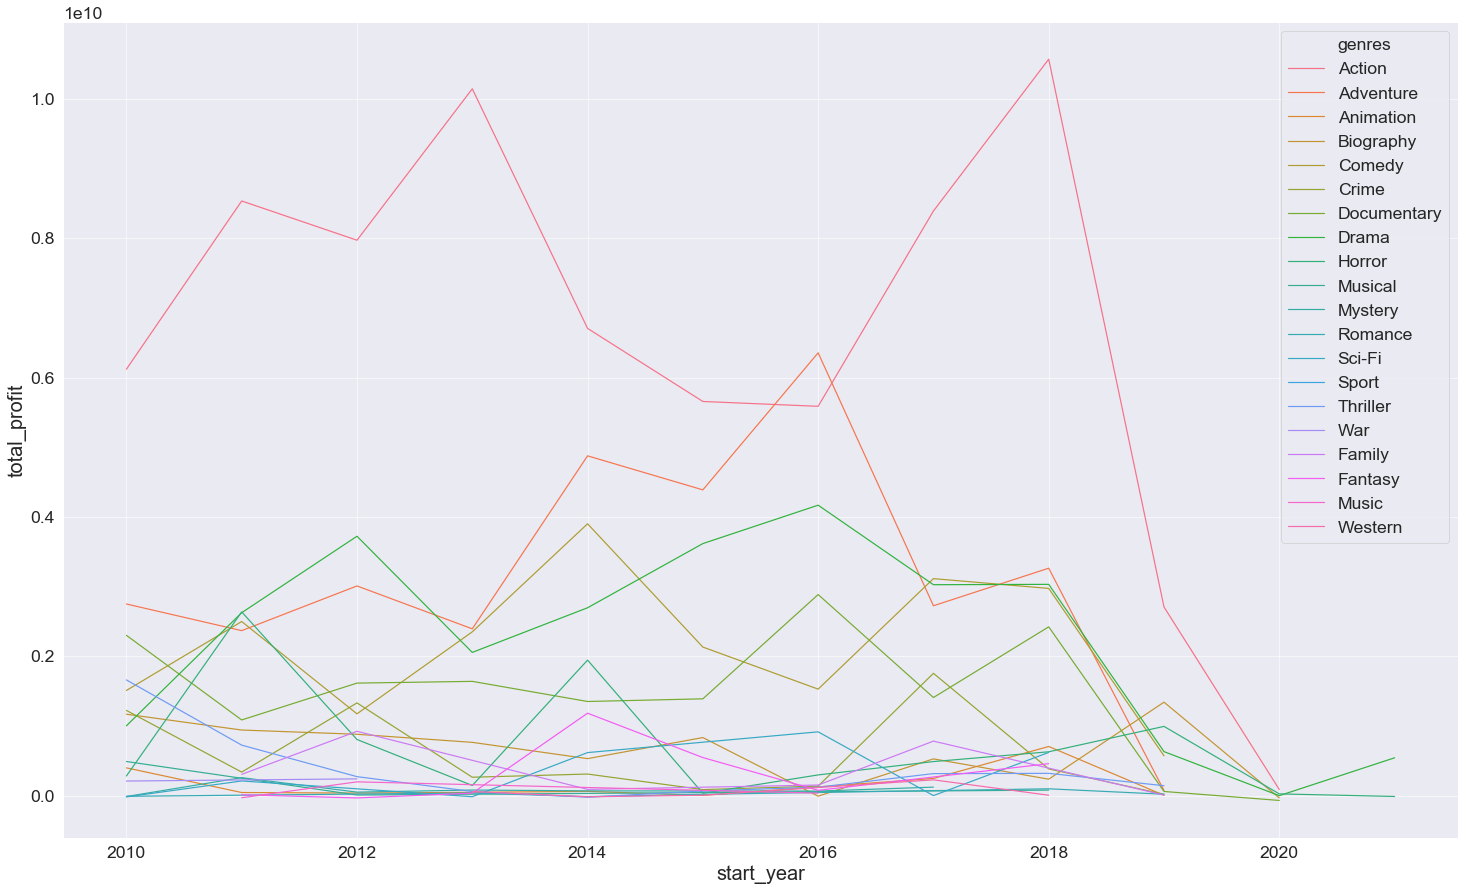

In [100]:
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px = sns.lineplot(x="start_year", y="total_profit", hue="genres",
                  data=df)

In [111]:
n_genres_df.head()

production_budget  domestic_gross  worldwide_gross  \
start_year genres                                                          
2010.0     Action          3.470700e+09    3.671293e+09     9.590798e+09   
           Adventure       1.197000e+09    1.516761e+09     3.946603e+09   
           Animation       2.150000e+08    2.826224e+08     6.122855e+08   
           Biography       9.080000e+08    9.012509e+08     2.075421e+09   
           Comedy          1.225000e+09    1.356928e+09     2.733486e+09   

                      total_profit  profit_margin  
start_year genres                                  
2010.0     Action     6.120098e+09    -170.857338  
           Adventure  2.749603e+09       5.290412  
           Animation  3.972855e+08       1.814915  
           Biography  1.167421e+09      -4.906329  
           Comedy     1.508486e+09    -114.632919

In [112]:
# What you want to do is actually again a groupby (on the result of the first groupby)
# Sort and take the first 7 elements per group.

In [113]:
#We group by the first level of the index:

In [119]:
atp = n_genres_df['total_profit'].groupby(level=0, group_keys=False)

In [120]:
#Then we want to sort ('order') each group and take the first 10 elements:

In [144]:
topten_prod_comp_year_df = atp.nlargest(12) 
topten_prod_comp_year_df.head()

start_year  genres     
2010.0      Action         6.120098e+09
            Adventure      2.749603e+09
            Documentary    2.299797e+09
            Thriller       1.659609e+09
            Comedy         1.508486e+09
Name: total_profit, dtype: float64

In [145]:
type(topten_prod_comp_year_df)

pandas.core.series.Series

In [146]:
st = topten_prod_comp_year_df.to_frame() #convert to Dataframe

In [147]:
st.head()

total_profit
start_year genres                   
2010.0     Action       6.120098e+09
           Adventure    2.749603e+09
           Documentary  2.299797e+09
           Thriller     1.659609e+09
           Comedy       1.508486e+09

In [148]:
df_genre_year_2 = st.reset_index()

In [149]:
df_genre_year_2.head()

,start_year,genres,total_profit
0,2010.0,Action,6.120098e+09
1,2010.0,Adventure,2.749603e+09
2,2010.0,Documentary,2.299797e+09
3,2010.0,Thriller,1.659609e+09
4,2010.0,Comedy,1.508486e+09


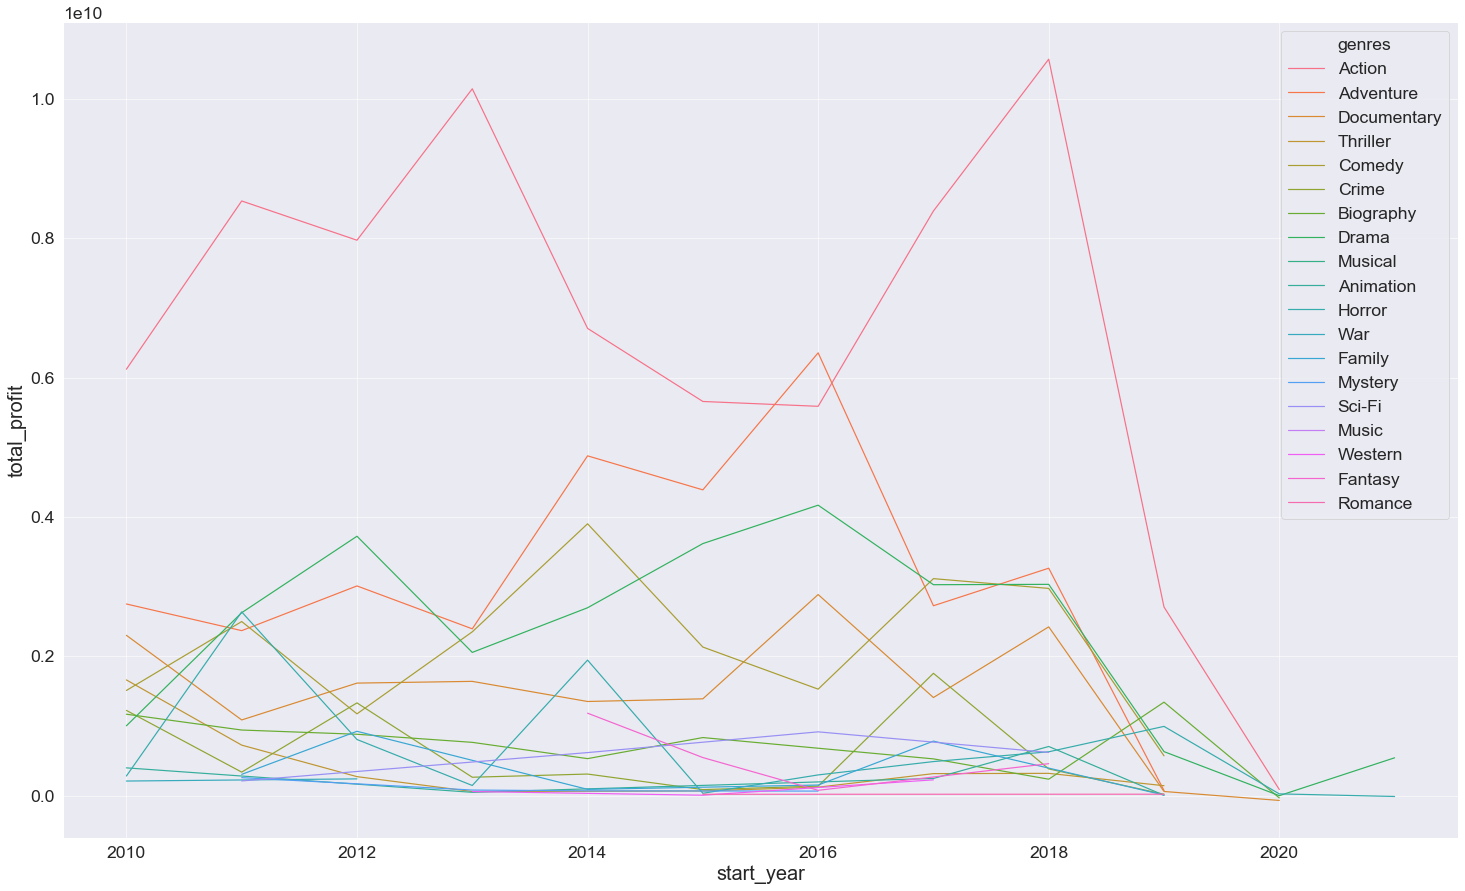

In [150]:
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px2 = sns.lineplot(x="start_year", y="total_profit", hue="genres",
                  data=df_genre_year_2)